In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/My Drive/president.csv')
data.head(10)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER
5,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,1481,1182850,20210113,NaN,LIBERTARIAN
6,1976,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,308,1182850,20210113,NaN,OTHER
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN
8,1976,ALASKA,AK,2,94,81,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,44058,123574,20210113,NaN,DEMOCRAT
9,1976,ALASKA,AK,2,94,81,US PRESIDENT,"MACBRIDE, ROGER",LIBERTARIAN,False,6785,123574,20210113,NaN,LIBERTARIAN


In [ ]:
print(data.describe())

              year   state_fips    state_cen     state_ic  candidatevotes  \
count  4287.000000  4287.000000  4287.000000  4287.000000    4.287000e+03   
mean   1999.080942    28.616982    53.665034    39.754840    3.119076e+05   
std      14.220014    15.616459    26.029189    22.772216    7.648011e+05   
min    1976.000000     1.000000    11.000000     1.000000    0.000000e+00   
25%    1988.000000    16.000000    33.000000    22.000000    1.177000e+03   
50%    2000.000000    28.000000    53.000000    42.000000    7.499000e+03   
75%    2012.000000    41.000000    81.000000    61.000000    1.992415e+05   
max    2020.000000    56.000000    95.000000    82.000000    1.111025e+07   

         totalvotes     version  notes  
count  4.287000e+03      4287.0    0.0  
mean   2.366924e+06  20210113.0    NaN  
std    2.465008e+06         0.0    NaN  
min    1.235740e+05  20210113.0    NaN  
25%    6.522740e+05  20210113.0    NaN  
50%    1.569180e+06  20210113.0    NaN  
75%    3.033118e+06

In [ ]:
print(data.isnull().sum())

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
dtype: int64


In [ ]:
#Feeling the null data with unknown

data['candidate'].fillna('Unknown', inplace=True)
data['party_detailed'].fillna('Unknown', inplace=True)

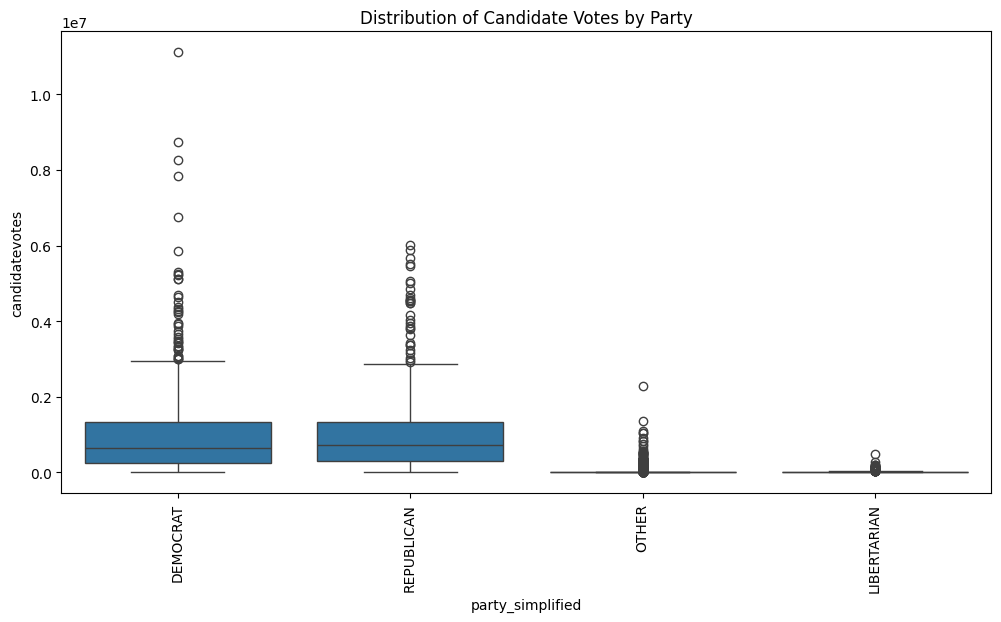

In [ ]:
# Box plot to show the distribution of 'candidatevotes' for each 'party_simplified'
plt.figure(figsize=(12, 6))
sns.boxplot(x='party_simplified', y='candidatevotes', data=data)
plt.title('Distribution of Candidate Votes by Party')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Highest Candidavotes for each state
idx = data.groupby(['state'])['candidatevotes'].idxmax()
idx

,candidatevotes
state,
ALABAMA,3741
ALASKA,2732
ARIZONA,3752
ARKANSAS,3771
CALIFORNIA,3773
COLORADO,3784
CONNECTICUT,3807
DELAWARE,3838
DISTRICT OF COLUMBIA,3842


In [ ]:
#top candidates based on each states max vote
top_candidates = data.loc[idx]
top_candidates

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
3741,2020,ALABAMA,AL,1,63,41,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,1441170,2323282,20210113,NaN,REPUBLICAN
2732,2008,ALASKA,AK,2,94,81,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,193841,326197,20210113,NaN,REPUBLICAN
3752,2020,ARIZONA,AZ,4,86,61,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1672143,3387326,20210113,NaN,DEMOCRAT
3771,2020,ARKANSAS,AR,5,71,42,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,760647,1219069,20210113,NaN,REPUBLICAN
3773,2020,CALIFORNIA,CA,6,93,71,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,11110250,17500881,20210113,NaN,DEMOCRAT
3784,2020,COLORADO,CO,8,84,62,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1804352,3279980,20210113,NaN,DEMOCRAT
3807,2020,CONNECTICUT,CT,9,16,1,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,1080831,1823857,20210113,NaN,DEMOCRAT
3838,2020,DELAWARE,DE,10,51,11,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,False,296268,504346,20210113,NaN,DEMOCRAT
3842,2020,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"BIDEN, JOSEPH R. JR",DEMOCRAT,True,317323,344356,20210113,NaN,DEMOCRAT
3850,2020,FLORIDA,FL,12,59,43,US PRESIDENT,"TRUMP, DONALD J.",REPUBLICAN,False,5668731,11067456,20210113,NaN,REPUBLICAN


In [ ]:
# Extract relevant columns (state and simplified party of the candidate with the highest votes)
result = top_candidates[['state', 'party_simplified']].reset_index(drop=True)
result

,state,party_simplified
0,ALABAMA,REPUBLICAN
1,ALASKA,REPUBLICAN
2,ARIZONA,DEMOCRAT
3,ARKANSAS,REPUBLICAN
4,CALIFORNIA,DEMOCRAT
5,COLORADO,DEMOCRAT
6,CONNECTICUT,DEMOCRAT
7,DELAWARE,DEMOCRAT
8,DISTRICT OF COLUMBIA,DEMOCRAT
9,FLORIDA,REPUBLICAN


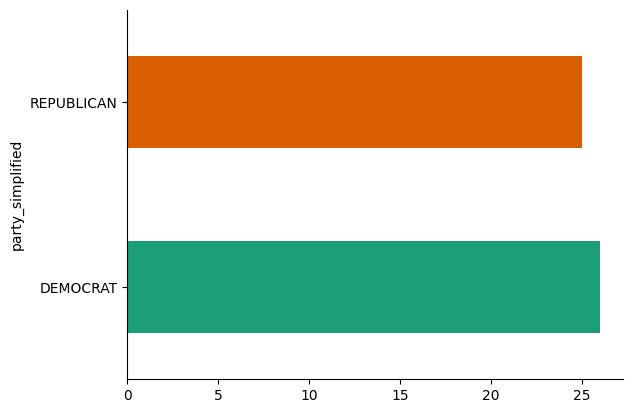

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
result.groupby('party_simplified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

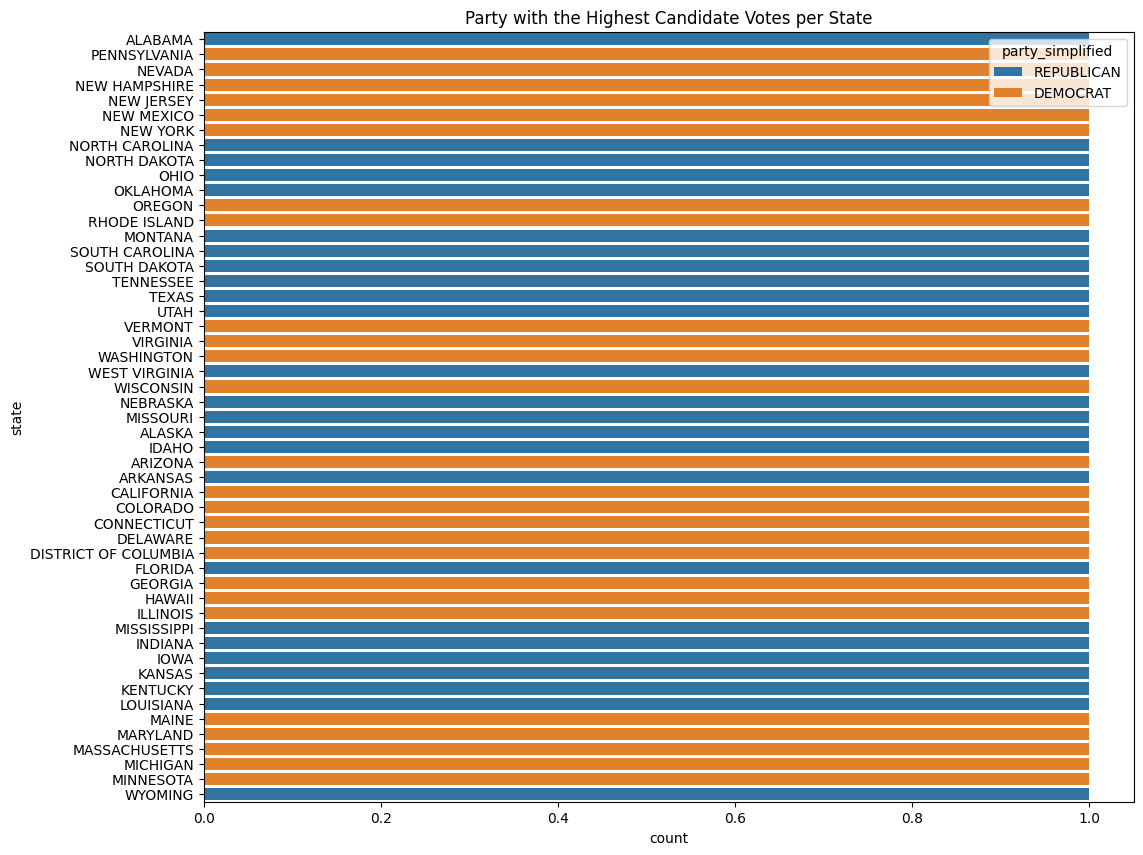

In [ ]:

# visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.countplot(y='state', hue='party_simplified', data=result, order=result['state'].value_counts().index)
plt.title('Party with the Highest Candidate Votes per State')
plt.show()


In [ ]:
grouped_data = data.groupby(['year', 'party_simplified'])['candidatevotes'].sum().reset_index()
grouped_data


idx = grouped_data.groupby(['year'])['candidatevotes'].idxmax()
idx

year
1976     0
1980     7
1984    11
1988    15
1992    16
1996    20
2000    24
2004    31
2008    32
2012    36
2016    40
2020    44
Name: candidatevotes, dtype: int64

In [ ]:
top_party_per_year = grouped_data.loc[idx]
top_party_per_year

,year,party_simplified,candidatevotes
0,1976,DEMOCRAT,40680446
7,1980,REPUBLICAN,43642639
11,1984,REPUBLICAN,54166829
15,1988,REPUBLICAN,48642640
16,1992,DEMOCRAT,44856747
20,1996,DEMOCRAT,47295351
24,2000,DEMOCRAT,50830580
31,2004,REPUBLICAN,61872711
32,2008,DEMOCRAT,69338846
36,2012,DEMOCRAT,65752017


from matplotlib import pyplot as plt
top_party_per_year['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_party_per_year['candidatevotes'].plot(kind='hist', bins=20, title='candidatevotes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
top_party_per_year.groupby('party_simplified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_party_per_year.plot(kind='scatter', x='year', y='candidatevotes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['candidatevotes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = top_party_per_year.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('party_simplified')):
  _plot_series(series, series_name, i)
  fig.legend(title='party_simplified', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('candidatevotes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = top_party_per_year.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('party_simplified')):
  _plot_series(series, series_name, i)
  fig.legend(title='party_simplified', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
top_party_per_year['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_party_per_year['candidatevotes'].plot(kind='line', figsize=(8, 4), title='candidatevotes')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_party_per_year['party_simplified'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_party_per_year, x='year', y='party_simplified', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_party_per_year['party_simplified'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_party_per_year, x='candidatevotes', y='party_simplified', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

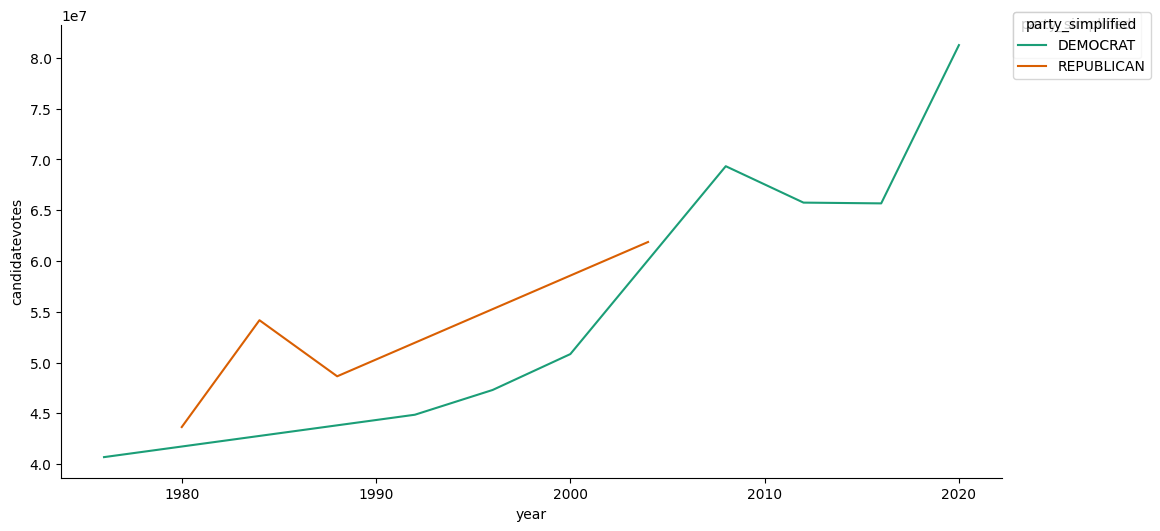

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['candidatevotes']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = top_party_per_year.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('party_simplified')):
  _plot_series(series, series_name, i)
  fig.legend(title='party_simplified', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('candidatevotes')

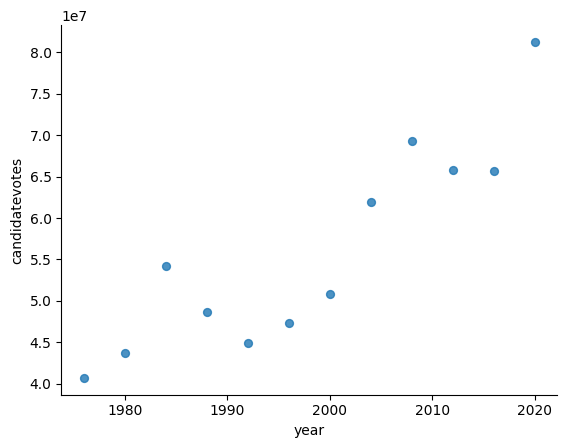

In [ ]:
from matplotlib import pyplot as plt
top_party_per_year.plot(kind='scatter', x='year', y='candidatevotes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

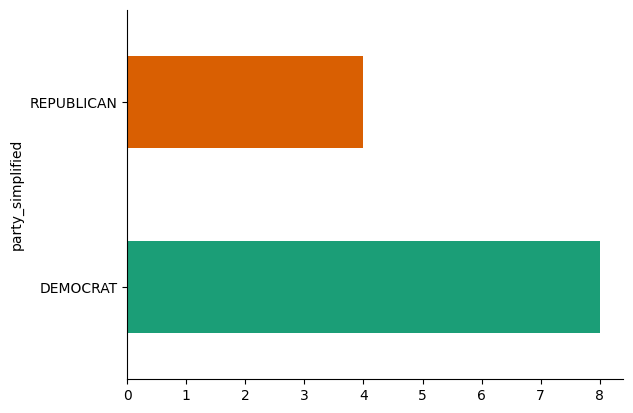

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
top_party_per_year.groupby('party_simplified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

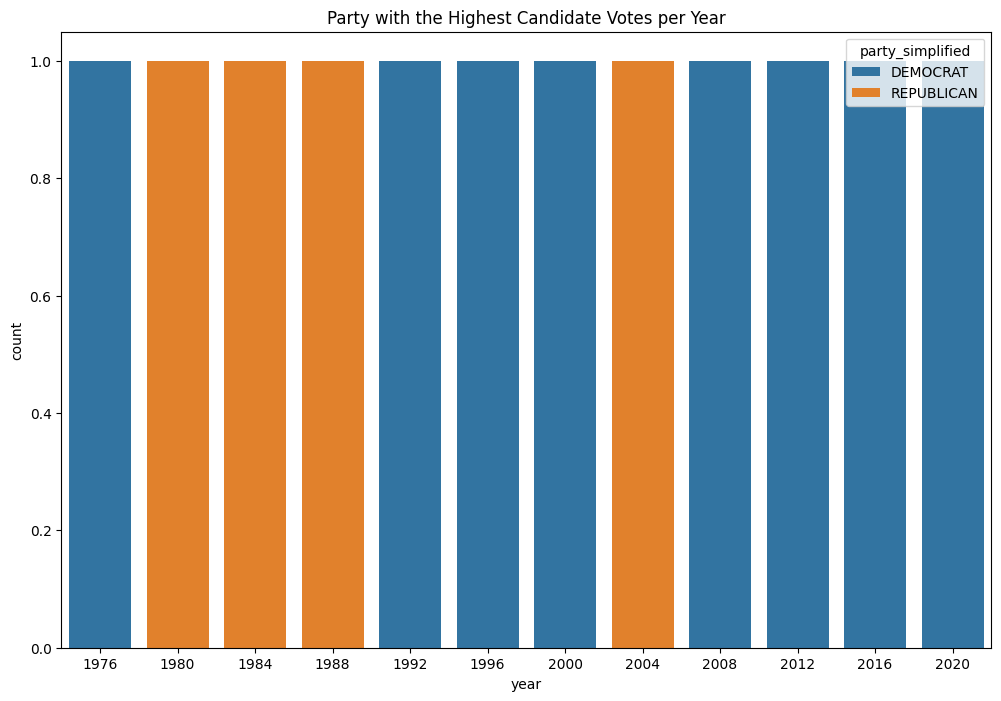

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_party_per_year' is the DataFrame you want to use
result = top_party_per_year

plt.figure(figsize=(12, 8))
sns.countplot(x='year', hue='party_simplified', data=result)
plt.title('Party with the Highest Candidate Votes per Year')
plt.show()

In [ ]:
import pandas as pd



# Group by year and find the row with the highest candidatevotes
idx = data.groupby(['year'])['candidatevotes'].idxmax()

# Select the rows with the highest candidatevotes for each year
top_candidates_per_year = data.loc[idx]

# Extract relevant columns (year and simplified party of the candidate with the highest votes)
result = top_candidates_per_year[['year', 'party_simplified']].reset_index(drop=True)

# Check the resulting DataFrame
print(result)




    year party_simplified
0   1976       REPUBLICAN
1   1980       REPUBLICAN
2   1984       REPUBLICAN
3   1988       REPUBLICAN
4   1992         DEMOCRAT
5   1996         DEMOCRAT
6   2000         DEMOCRAT
7   2004         DEMOCRAT
8   2008         DEMOCRAT
9   2012         DEMOCRAT
10  2016         DEMOCRAT
11  2020         DEMOCRAT


In [ ]:
# Group by year and find the row with the highest candidatevotes
idx = data.groupby(['year'])['candidatevotes'].idxmax()

# Select the rows with the highest candidatevotes for each year
top_candidates_per_year = data.loc[idx]

# Extract relevant columns (year, candidate, and simplified party of the candidate with the highest votes)
result = top_candidates_per_year[['year', 'candidate', 'party_simplified']].reset_index(drop=True)

# Check the resulting DataFrame
print(result)

    year            candidate party_simplified
0   1976         FORD, GERALD       REPUBLICAN
1   1980       REAGAN, RONALD       REPUBLICAN
2   1984       REAGAN, RONALD       REPUBLICAN
3   1988    BUSH, GEORGE H.W.       REPUBLICAN
4   1992        CLINTON, BILL         DEMOCRAT
5   1996        CLINTON, BILL         DEMOCRAT
6   2000             GORE, AL         DEMOCRAT
7   2004          KERRY, JOHN         DEMOCRAT
8   2008     OBAMA, BARACK H.         DEMOCRAT
9   2012     OBAMA, BARACK H.         DEMOCRAT
10  2016     CLINTON, HILLARY         DEMOCRAT
11  2020  BIDEN, JOSEPH R. JR         DEMOCRAT


In [ ]:
data['party_simplified'] = data['party_simplified'].str.lower()

# Define a function to map parties to specific codes
def encode_party(party):
    if party == 'republican':
        return 1
    elif party == 'democrat':
        return 0
    else:
        return 2  # or 'other'

# Apply the function to create a new column
data['party_binary'] = data['party_simplified'].apply(encode_party)


# Display the first few rows to verify
print(data[['party_simplified', 'party_binary']].head())

data.to_csv('processed_presidential_data_with_party_encoding.csv', index=False)

  party_simplified  party_binary
0         democrat             0
1       republican             1
2            other             2
3            other             2
4            other             2


In [ ]:
#Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer # Import imputer to handle NaN values



# Define the features and target variable
# Drop columns not used as features
X = data.drop(columns=['party_binary', 'party_simplified'])

# Identify all columns with object data type (potential categorical columns)
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to all categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Impute missing values using a SimpleImputer (replace NaN with most frequent value)
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X) # Fit and transform to fill NaN

# Convert the NumPy array back to a Pandas DataFrame to check dtypes
X = pd.DataFrame(X)  # Convert NumPy array back to DataFrame

# Check if all columns are now numeric
print(X.dtypes)

# Ensure target variable is correctly defined
y = data['party_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['notes']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
542    float64
543    float64
544    float64
545    float64
546    float64
Length: 547, dtype: object
Accuracy: 0.8251748251748252
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.59      0.50       121
           1       0.36      0.23      0.28       124
           2       0.99      0.99      0.99       613

    accuracy                           0.83       858
   macro avg       0.59      0.60      0.59       858
weighted avg       0.82      0.83      0.82       858



In [ ]:
print(X.head())  # Display the first few rows of the DataFrame
print(X.shape)  # Removed the extra space before this line

      0    1     2     3         4          5           6    7    8    9    \
0  1976.0  1.0  63.0  41.0  659170.0  1182850.0  20210113.0  0.0  0.0  0.0   
1  1976.0  1.0  63.0  41.0  504070.0  1182850.0  20210113.0  0.0  0.0  0.0   
2  1976.0  1.0  63.0  41.0    9198.0  1182850.0  20210113.0  0.0  0.0  0.0   
3  1976.0  1.0  63.0  41.0    6669.0  1182850.0  20210113.0  0.0  0.0  0.0   
4  1976.0  1.0  63.0  41.0    1954.0  1182850.0  20210113.0  0.0  0.0  0.0   

   ...  537  538  539  540  541  542  543  544  545  546  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 547 columns]
(4287, 547)


In [ ]:
#Random Forest Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# Identify all columns with object data type (potential categorical columns)
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to all categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Ensure target variable is correctly defined
y = data['party_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       613

    accuracy                           1.00       858
   macro avg       1.00      1.00      1.00       858
weighted avg       1.00      1.00      1.00       858



In [ ]:
#Gradient Boosting Classifier

from xgboost import XGBClassifier

X = data.drop(columns=['party_binary', 'party_simplified'])

# Identify all columns with object data type (potential categorical columns)
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to all categorical variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Ensure target variable is correctly defined
y = data['party_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       613

    accuracy                           1.00       858
   macro avg       1.00      1.00      1.00       858
weighted avg       1.00      1.00      1.00       858

